## 시작을 위한 코드

In [2]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 선형회귀분석 모델
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가 함수
from sklearn.metrics import r2_score
# 선형 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# 한글 폰트 설정 (맑은 고딕)
matplotlib.rc("font", family='Malgun Gothic')
matplotlib.rc("axes", unicode_minus=False)
matplotlib.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')


In [3]:
# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [4]:
# 폰트 설정
# import matplotlib.font_manager as fm  # Import the font_manager module
# import matplotlib as mpl  # Import matplotlib

# path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔 고딕
# font_name = fm.FontProperties(fname=path, size=20).get_name()  # 기본 폰트 사이즈 : 20
# plt.rc('font', family=font_name)
# fm.fontManager.addfont(path)
# mpl.rcParams['axes.unicode_minus'] = False
# %matplotlib inline

In [5]:
# 'null'을 NaN으로 변환하며 CSV 파일 불러오기
df_raw = pd.read_csv('./data/Car.csv',encoding='euc-kr', na_values=['null'])

In [11]:
df_raw.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

## 1. New Price drop

In [14]:
df_raw=df_raw.drop(['New_Price'], axis=1) # New Price 제거

## 1.5. Name -> brand / name 분리 (Brand 파생변수 생성)

In [17]:
import pandas as pd

# 브랜드 리스트 (수정된 버전)
valid_brands = {'Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
                'Volkswagen', 'Tata', 'LandRover', 'Mitsubishi', 'Renault',
                'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
                'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
                'Smart', 'ISUZU', 'Force', 'Bentley', 'Lamborghini',
                'Hindustan', 'Opel'}

# 브랜드명 수정 매핑
brand_corrections = {
    'Land': 'LandRover',  # 'Land' 단독 → 'Land Rover'로 수정
    'OpelCorsa': 'Opel',  # 'OpelCorsa' → 'Opel'
    'Ambassador': 'Hindustan'  # 'Ambassador' → 'Hindustan'
}

# Name 컬럼 정리
def clean_name(name):
    name_split = name.split(' ')
    first_word = name_split[0]

    # 브랜드명이 수정이 필요한 경우 변환
    if first_word in brand_corrections:
        first_word = brand_corrections[first_word]

    # 브랜드명이 유효한 브랜드 리스트에 없으면 삭제 (이후 Brand 컬럼 생성 시 오류 방지)
    if first_word not in valid_brands:
        return 'UNKNOWN ' + ' '.join(name_split[1:])  # 잘못된 경우 UNKNOWN 태그 추가

    # 수정된 브랜드명 + 원래 모델명 유지
    return first_word + ' ' + ' '.join(name_split[1:])

# Name 컬럼 업데이트
df_raw['Name'] = df_raw['Name'].apply(clean_name)

# Brand 컬럼 생성 (첫 번째 단어만 추출)
df_raw['Brand'] = df_raw['Name'].str.split(' ').str[0]
df_raw['Name'] = df_raw['Name'].str.replace(r'^\S+\s*', '', regex=True)
df_raw = df_raw[['Brand'] + [col for col in df_raw.columns if col != 'Brand']]







In [19]:
df_raw.head()

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,Honda,Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,Maruti,Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0


## 2. 단위 분리+자료형 변경

### 2-1.마일리지

In [24]:
df_raw[['Mileage(kmpl)','Mileage_unit']] = df_raw['Mileage'].str.split(expand = True)
df_raw['Mileage(kmpl)'] = df_raw['Mileage(kmpl)'].astype('float64')

### 2-2. Engine

In [27]:
df_raw[['Engine(CC)', 'Engine_unit']] = df_raw['Engine'].str.split(expand = True)
df_raw['Engine(CC)'] = df_raw['Engine(CC)'].astype('float64')

### 2-3. Power

In [30]:
df_raw[['Power(bhp)', 'Power_unit']] = df_raw['Power'].str.split(expand = True)
# df_raw['Power(bhp)'] = df_raw['Power(bhp)'].astype('float64')
df_raw['Power(bhp)'] = pd.to_numeric(df_raw['Power(bhp)'], errors='coerce')
# 파워에 결측값 있는거 같아
# chatgpt에서 찾은 분리 방법으로 해결

### 2-4. 기존 mileage, engine, power 컬럼 제거

In [33]:
df_raw=df_raw.drop(['Mileage','Engine','Power','Mileage_unit','Engine_unit','Power_unit'], axis=1)

## 3. 이상치 탐색 & 처리

### 3-1. Price 이상치

In [38]:
# 벤츠 가격이 7.08 -> 결측값으로 처리
df_raw.loc[df_raw['Name']=='Elite i20 Magna Plus','Price']=None # test data에 추가 (index=7236)

In [40]:
# 벤츠 AMG 가격이 너무 싸서 결측값으로 처리
df_raw.loc[df_raw['Name']=='SLC 43 AMG','Price']=None

In [42]:
# 타타 nano CX도 너무 싸서 모델에 성능을 떨어뜨릴거 같아서 제거
df_raw.loc[df_raw['Name']=='Nano CX','Price']=None

In [44]:
# Porche 가격이 너무 싸서 결측값 처리
df_raw.loc[df_raw['Name']=='Cayenne Base','Price']=None


In [46]:
df_raw.sort_values(by='Kilometers_Driven',ascending=False)

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp)
2328,BMW,X5 xDrive 30d M Sport,Chennai,99642.40,2017,6500000,Diesel,Automatic,First,5.0,15.97,2993.0,258.00
340,Skoda,Octavia Ambition Plus 2.0 TDI AT,Kolkata,11497.20,2013,775000,Diesel,Automatic,First,5.0,19.30,1968.0,141.00
1860,Volkswagen,Vento Diesel Highline,Chennai,9044.46,2013,720000,Diesel,Manual,First,5.0,20.54,1598.0,103.60
358,Hyundai,i10 Magna 1.2,Chennai,4138.99,2009,620000,Petrol,Manual,First,5.0,20.36,1197.0,78.90
2823,Volkswagen,Jetta 2013-2015 2.0L TDI Highline AT,Chennai,19928.48,2015,480000,Diesel,Automatic,First,5.0,16.96,1968.0,138.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,Hyundai,i20 Active SX Dual Tone Petrol,Pune,13183.46,2019,1000,Petrol,Manual,First,5.0,17.19,1197.0,81.86
1598,Tata,Xenon XT EX 4X2,Jaipur,11497.20,2017,1000,Diesel,Manual,First,5.0,13.49,2179.0,138.03
1242,Jaguar,XE 2.0L Diesel Prestige,Delhi,61318.40,2018,1000,Diesel,Automatic,First,5.0,13.60,1999.0,177.00
5606,Maruti,Wagon R ZXI AMT 1.2,Mumbai,9581.00,2019,600,Petrol,Automatic,First,5.0,21.50,1197.0,81.80


### 3-2. Km 이상치

In [49]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              7253 non-null   object 
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Price              6194 non-null   float64
 4   Year               7253 non-null   int64  
 5   Kilometers_Driven  7253 non-null   int64  
 6   Fuel_Type          7253 non-null   object 
 7   Transmission       7253 non-null   object 
 8   Owner_Type         7253 non-null   object 
 9   Seats              7200 non-null   float64
 10  Mileage(kmpl)      7251 non-null   float64
 11  Engine(CC)         7207 non-null   float64
 12  Power(bhp)         7078 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


In [51]:
# 1. 해당 모델만 필터링
mask = df_raw['Name'] == 'X5 xDrive 30d M Sport'

# 2. 정상적인 Kilometers_Driven 평균 계산 (이상치 제외)
valid_mean = df_raw.loc[mask & (df_raw['Kilometers_Driven'] != 6500000), 'Kilometers_Driven'].mean()

# 3. 이상치 값을 평균으로 대체
df_raw.loc[mask & (df_raw['Kilometers_Driven'] == 6500000), 'Kilometers_Driven'] = valid_mean
 ## 6백 50만 킬로미터 행 평균으로 대체

In [53]:
df_raw[df_raw['Kilometers_Driven'] == 6500000]

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp)


In [55]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              7253 non-null   object 
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Price              6194 non-null   float64
 4   Year               7253 non-null   int64  
 5   Kilometers_Driven  7253 non-null   int64  
 6   Fuel_Type          7253 non-null   object 
 7   Transmission       7253 non-null   object 
 8   Owner_Type         7253 non-null   object 
 9   Seats              7200 non-null   float64
 10  Mileage(kmpl)      7251 non-null   float64
 11  Engine(CC)         7207 non-null   float64
 12  Power(bhp)         7078 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


### 3-3. Mileage가 0 인 값 mean | median

In [58]:
df_raw[df_raw['Power(bhp)']==0]

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp)


In [60]:
# 1. 동일한 Brand + Fuel_Type 기준으로 평균값 채우기
# 특정 컬럼에서 값이 0이면 NaN으로 변환(
columns_to_fix = ['Mileage(kmpl)']
df_raw[columns_to_fix] = df_raw[columns_to_fix].replace(0, None)
df_raw['Mileage(kmpl)'] = df_raw.groupby(['Brand', 'Fuel_Type'])['Mileage(kmpl)'].transform(lambda x: x.fillna(x.mean()))

# 2. 그래도 결측치가 남아 있다면 Brand별 평균으로 대체
df_raw['Mileage(kmpl)'] = df_raw.groupby('Brand')['Mileage(kmpl)'].transform(lambda x: x.fillna(x.mean()))

# 3. 여전히 결측치가 남아 있다면 전체 중앙값으로 대체
df_raw['Mileage(kmpl)'].fillna(df_raw['Mileage(kmpl)'].median(), inplace=True)

In [63]:
# 마일리지 0인 행 대체 되었는지 확인
df_raw[df_raw['Mileage(kmpl)']==0]


,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp)


### 3-4. Seats 0 -> 5

In [66]:
# Seats unique로 보기
df_raw['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [68]:
# Seats 내림 차순으로 정렬
df_raw.sort_values(by='Seats',ascending=False)

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp)
6875,Toyota,Qualis FS B3,Pune,NaN,2002,119613,Diesel,Manual,Second,10.0,13.100000,2446.0,75.0
917,Tata,Sumo DX,Mumbai,8048.04,2013,20000,Diesel,Manual,First,10.0,14.070000,1978.0,83.1
2575,Chevrolet,Tavera LS B3 10 Seats BSIII,Hyderabad,8431.28,2015,120000,Diesel,Manual,First,10.0,14.800000,2499.0,80.0
6242,Tata,Sumo EX 10/7 Str BSII,Chennai,NaN,2015,196000,Diesel,Manual,Second,10.0,12.200000,1948.0,68.0
1907,Toyota,Qualis FS B3,Bangalore,5595.30,2002,63000,Diesel,Manual,Third,10.0,13.100000,2446.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,Fiat,Punto 1.4 Emotion,Jaipur,NaN,2010,65000,Petrol,Manual,Third,NaN,14.600000,NaN,NaN
6685,Maruti,Swift 1.3 VXi,Pune,NaN,2010,115000,Petrol,Manual,Second,NaN,16.100000,NaN,NaN
6880,BMW,5 Series 520d Sedan,Chennai,NaN,2009,95000,Diesel,Automatic,Second,NaN,18.480000,NaN,NaN
6902,Toyota,Etios Liva V,Kochi,NaN,2012,59311,Petrol,Manual,First,NaN,18.300000,NaN,NaN


In [70]:
# seats 0인값 확인
df_raw[df_raw['Seats']==0]

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp)
3999,Audi,A4 3.2 FSI Tiptronic Quattro,Hyderabad,27593.28,2012,125000,Petrol,Automatic,First,0.0,10.5,3197.0,NaN


In [72]:
# Seats 0값 5로
df_raw.loc[df_raw['Seats']==0.0,'Seats'] = 5

In [74]:
# Seats가 0 -> 5로 바꾼거 확인
df_raw[df_raw['Name']=='A4 3.2 FSI Tiptronic Quattro']

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp)
3999,Audi,A4 3.2 FSI Tiptronic Quattro,Hyderabad,27593.28,2012,125000,Petrol,Automatic,First,5.0,10.5,3197.0,NaN


### 3-5. Fuel-Type elec-> None

In [77]:
 # 전기차 Engine(CC) 결측치로 처리
df_raw.loc[df_raw['Fuel_Type']=='Electric','Engine(CC)']=None

In [79]:
# 전기차의 Engine(CC)를 결측값으로 대체완료 확인
df_raw[df_raw['Fuel_Type']=='Electric']

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp)
4446,Mahindra,E Verito D4,Chennai,19928.48,2016,50000,Electric,Automatic,First,5.0,15.304606,NaN,41.0
4904,Toyota,Prius 2009-2016 Z4,Mumbai,19545.24,2011,44000,Electric,Automatic,First,5.0,14.501671,NaN,73.0


## 4. 결측치 처리

### 4-1. Engine 결측(38개) -> 동일차종 mean | median

In [83]:
# 1. 동일한 Brand + Model 기준으로 평균값 채우기
df_raw['Engine(CC)'] = df_raw.groupby(['Brand'])['Engine(CC)'].transform(lambda x: x.fillna(x.mean()))

# 2. 동일한 Brand 기준으로 평균값으로 채우기
df_raw['Engine(CC)'] = df_raw.groupby('Brand')['Engine(CC)'].transform(lambda x: x.fillna(x.mean()))

# 3. 그래도 남은 결측치는 중앙값으로 대체
df_raw['Engine(CC)'].fillna(df_raw['Engine(CC)'].median(), inplace=True)

### 4-2. Seats 결측(42개) -> 동일 차종 mean | median

In [86]:
df_raw['Seats'] = df_raw.groupby('Brand')['Seats'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

# 2. 전체 좌석 수의 최빈값(대부분 5로 예상)으로 대체
df_raw['Seats'].fillna(df_raw['Seats'].mode()[0], inplace=True)

### 4-3. Power 결측(143개) -> 동일 차종 mean | median

In [89]:
# 1. 동일한 Brand + Engine 크기 기준으로 평균값 채우기
df_raw['Power(bhp)'] = df_raw.groupby(['Brand', 'Engine(CC)'])['Power(bhp)'].transform(lambda x: x.fillna(x.mean()))

# 2. 동일한 Engine 크기 기준으로 평균값 채우기
df_raw['Power(bhp)'] = df_raw.groupby('Engine(CC)')['Power(bhp)'].transform(lambda x: x.fillna(x.mean()))

# 3. 그래도 남은 결측치는 중앙값으로 대체
df_raw['Power(bhp)'].fillna(df_raw['Power(bhp)'].median(), inplace=True)

## 5. 파생 변수 생성

### 5-1. Car_Age(차 연식) 컬럼 생성

In [93]:
# 2024-year로 차 연식 컬럼 생성
df_raw['Car_Age'] = 2024 - df_raw['Year']

In [95]:
# Car_Age 컬럼 생긴거 확인
df_raw.head()

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age
0,Maruti,Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,14
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,9
2,Honda,Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,13
3,Maruti,Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,12
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,11


### 5-2. 주행거리 대비 연식(Km_per_Year) 컬럼 생성

In [99]:
# 주행거리 대비 연식(소수점 3자리째 까지)

df_raw['Km_per_Year'] = (df_raw['Kilometers_Driven']/df_raw['Car_Age']).round(3)
# df_raw['Km_per_Year'] = (df_raw['Kilometers_Driven']/df_raw['Fuel_Type']).round(3)

In [101]:
# Km_per_Year 컬럼 생긴거 확인
df_raw.head()

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year
0,Maruti,Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,14,5142.857
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,9,4555.556
2,Honda,Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,13,3538.462
3,Maruti,Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,12,7250.000
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,11,3697.273


### 5-3. Owner_Type 숫자로 Mapping?

In [104]:
# 변환할 매핑 딕셔너리 생성
owner_mapping = {'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}

# map()을 이용해 수치형 변환
df_raw['Owner_Type'] = df_raw['Owner_Type'].map(owner_mapping)

In [106]:
# Owner_Type 컬럼 바뀐거 확인
df_raw.head()

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year
0,Maruti,Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,1,5.0,26.60,998.0,58.16,14,5142.857
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,1,5.0,19.67,1582.0,126.20,9,4555.556
2,Honda,Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,1,5.0,18.20,1199.0,88.70,13,3538.462
3,Maruti,Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,1,7.0,20.77,1248.0,88.76,12,7250.000
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,2,5.0,15.20,1968.0,140.80,11,3697.273


### 5-4. 차량 크기(Size) 컬럼 생성(Engine(CC)를 통한 크기 추정을 통해....)

In [109]:
# 차량 크기를 분류하는 함수

def categorize_size(cc):
    if cc >= 2000:
        return 'Large'
    elif 1000 <= cc < 2000:
        return 'Medium'
    else:
        return 'Small'

# 새로운 'Size' 컬럼 추가
df_raw['Size'] = df_raw['Engine(CC)'].apply(categorize_size)

In [111]:
# Size 컬럼 잘 만들었는지 확인
df_raw.head()

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size
0,Maruti,Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,1,5.0,26.60,998.0,58.16,14,5142.857,Small
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,1,5.0,19.67,1582.0,126.20,9,4555.556,Medium
2,Honda,Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,1,5.0,18.20,1199.0,88.70,13,3538.462,Medium
3,Maruti,Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,1,7.0,20.77,1248.0,88.76,12,7250.000,Medium
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,2,5.0,15.20,1968.0,140.80,11,3697.273,Medium


In [113]:
df_raw['Size'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [115]:
# 인코딩

size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}

# 매핑 적용
df_raw['Size'] = df_raw['Size'].map(size_mapping)


In [117]:
df_raw.head()

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size
0,Maruti,Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,1,5.0,26.60,998.0,58.16,14,5142.857,1
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,1,5.0,19.67,1582.0,126.20,9,4555.556,2
2,Honda,Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,1,5.0,18.20,1199.0,88.70,13,3538.462,2
3,Maruti,Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,1,7.0,20.77,1248.0,88.76,12,7250.000,2
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,2,5.0,15.20,1968.0,140.80,11,3697.273,2


### 5-5. 지역(Location)과 GDP를 통해 GDP 그룹(GDP_Group)을 추가

In [120]:
# 지역에 따른 GDP 정도를 통해 새로운 GDP 그룹 추가
gdp_groups = {
    'Delhi': 'High GDP',
    'Mumbai': 'High GDP',
    'Pune': 'Upper-Middle GDP',
    'Ahmedabad': 'Upper-Middle GDP',
    'Chennai': 'Upper-Middle GDP',
    'Coimbatore': 'Lower-Middle GDP',
    'Hyderabad': 'Upper-Middle GDP',
    'Kochi': 'Lower GDP',
    'Bangalore': 'High GDP',
    'Kolkata': 'High GDP',
    'Jaipur': 'Lower GDP'
}


df_raw["GDP_Group"] = df_raw["Location"].map(gdp_groups)

In [122]:
# 잘 만들어 졌는지 확인
df_raw["GDP_Group"].unique()

array(['High GDP', 'Upper-Middle GDP', 'Lower-Middle GDP', 'Lower GDP'],
      dtype=object)

In [124]:
# 인코딩

gdp_mapping = {'High GDP': 4, 'Upper-Middle GDP': 3, 'Lower-Middle GDP': 2,'Lower GDP':1 }

# 매핑 적용
df_raw['GDP_Group'] = df_raw['GDP_Group'].map(gdp_mapping)



In [126]:
df_raw.head()

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group
0,Maruti,Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,1,5.0,26.60,998.0,58.16,14,5142.857,1,4
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,1,5.0,19.67,1582.0,126.20,9,4555.556,2,3
2,Honda,Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,1,5.0,18.20,1199.0,88.70,13,3538.462,2,3
3,Maruti,Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,1,7.0,20.77,1248.0,88.76,12,7250.000,2,3
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,2,5.0,15.20,1968.0,140.80,11,3697.273,2,2


### 5-6. Brand를 가격 별로 분류하기 (저가형, 중저가형......)

In [129]:
# brand를 가격대로 분류한 brand_segment 컬럼 만들기)

brand_segment = {
    'Datsun': 'Low',
    'Hindustan': 'Low',
    'Tata': 'Low',
    'Smart': 'Low',

    'Maruti': 'Lower-Mid',
    'Hyundai': 'Lower-Mid',
    'Honda': 'Lower-Mid',
    'Ford': 'Lower-Mid',
    'Nissan': 'Lower-Mid',
    'Renault': 'Lower-Mid',
    'Mahindra': 'Lower-Mid',
    'Chevrolet': 'Lower-Mid',
    'Fiat': 'Lower-Mid',

    'Toyota': 'Upper-Mid',
    'Volkswagen': 'Upper-Mid',
    'Skoda': 'Upper-Mid',
    'ISUZU': 'Upper-Mid',
    'Mitsubishi': 'Upper-Mid',
    'Jeep': 'Upper-Mid',
    'Mini': 'Upper-Mid',
    'Opel': 'Upper-Mid',

    'Audi': 'High',
    'Mercedes-Benz': 'High',
    'BMW': 'High',
    'Jaguar': 'High',
    'Volvo': 'High',
    'Porsche': 'High',
    'LandRover': 'High',
    'Bentley': 'High',
    'Lamborghini': 'High',
    'Force': 'High'
}

df_raw["Brand_Segment"] = df_raw["Brand"].map(brand_segment)


In [131]:
df_raw.head()

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment
0,Maruti,Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,1,5.0,26.60,998.0,58.16,14,5142.857,1,4,Lower-Mid
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,1,5.0,19.67,1582.0,126.20,9,4555.556,2,3,Lower-Mid
2,Honda,Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,1,5.0,18.20,1199.0,88.70,13,3538.462,2,3,Lower-Mid
3,Maruti,Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,1,7.0,20.77,1248.0,88.76,12,7250.000,2,3,Lower-Mid
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,2,5.0,15.20,1968.0,140.80,11,3697.273,2,2,High


In [133]:
df_raw.isnull().sum()

Brand                   0
Name                    0
Location                0
Price                1059
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Mileage(kmpl)           0
Engine(CC)              0
Power(bhp)              0
Car_Age                 0
Km_per_Year             0
Size                    0
GDP_Group               0
Brand_Segment           0
dtype: int64

In [135]:
# 브랜드 인코딩

brand_mapping = {'High': 4, 'Upper-Mid': 3, 'Lower-Mid': 2,'Low':1 }

# 매핑 적용
df_raw['Brand_Segment'] = df_raw['Brand_Segment'].map(brand_mapping)

In [137]:
df_raw.head()

,Brand,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment
0,Maruti,Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,1,5.0,26.60,998.0,58.16,14,5142.857,1,4,2
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,1,5.0,19.67,1582.0,126.20,9,4555.556,2,3,2
2,Honda,Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,1,5.0,18.20,1199.0,88.70,13,3538.462,2,3,2
3,Maruti,Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,1,7.0,20.77,1248.0,88.76,12,7250.000,2,3,2
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,2,5.0,15.20,1968.0,140.80,11,3697.273,2,2,4


In [139]:
before_dummy = df_raw

In [141]:
before_dummy.to_csv("before_dummy.csv")

### 5-7.    범주형 변수 인코딩 (더미)

In [144]:
df_for_dummy = df_raw.drop(["Brand", "Name","Location"], axis = 1)

In [146]:
df_for_dummy.head()

,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment
0,2682.68,2010,72000,CNG,Manual,1,5.0,26.60,998.0,58.16,14,5142.857,1,4,2
1,19162.00,2015,41000,Diesel,Manual,1,5.0,19.67,1582.0,126.20,9,4555.556,2,3,2
2,6898.32,2011,46000,Petrol,Manual,1,5.0,18.20,1199.0,88.70,13,3538.462,2,3,2
3,9197.76,2012,87000,Diesel,Manual,1,7.0,20.77,1248.0,88.76,12,7250.000,2,3,2
4,27194.71,2013,40670,Diesel,Automatic,2,5.0,15.20,1968.0,140.80,11,3697.273,2,2,4


In [148]:
# 범주형 변수의 Dummy 변수화
df_dummy = pd.get_dummies(df_for_dummy, drop_first=True, dtype=int)


In [150]:
df_dummy.head()

,Price,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2682.68,2010,72000,1,5.0,26.60,998.0,58.16,14,5142.857,1,4,2,0,0,0,0,1
1,19162.00,2015,41000,1,5.0,19.67,1582.0,126.20,9,4555.556,2,3,2,1,0,0,0,1
2,6898.32,2011,46000,1,5.0,18.20,1199.0,88.70,13,3538.462,2,3,2,0,0,0,1,1
3,9197.76,2012,87000,1,7.0,20.77,1248.0,88.76,12,7250.000,2,3,2,1,0,0,0,1
4,27194.71,2013,40670,2,5.0,15.20,1968.0,140.80,11,3697.273,2,2,4,1,0,0,0,0


## 6.Price 결측값 분리 및 train data와 test data 분리

### 6-1. Price 결측값이 존재하는 데이터 프레임과 그렇지 않은 데이터 프레임 분리 및 Price 결측값 데이터 저장

In [154]:
df_dummy.isnull().sum()

Price                  1059
Year                      0
Kilometers_Driven         0
Owner_Type                0
Seats                     0
Mileage(kmpl)             0
Engine(CC)                0
Power(bhp)                0
Car_Age                   0
Km_per_Year               0
Size                      0
GDP_Group                 0
Brand_Segment             0
Fuel_Type_Diesel          0
Fuel_Type_Electric        0
Fuel_Type_LPG             0
Fuel_Type_Petrol          0
Transmission_Manual       0
dtype: int64

In [156]:
# Price == na 인 행만 분리 후 따로 파일 생성(더미 변환 후)
df_price_nan = df_dummy[df_dummy["Price"].isna()]
df_price_nan.to_csv("df_price_nan.csv")

In [158]:
df_price_nan.head()

,Price,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
134,NaN,2017,13372,1,2.0,19.00,2996.0,362.07,7,1910.286,3,4,4,0,0,0,1,0
2095,NaN,2019,2526,1,2.0,19.00,2996.0,362.07,5,505.200,3,2,4,0,0,0,1,0
3132,NaN,2019,14298,1,5.0,13.33,2995.0,340.00,5,2859.600,3,1,4,0,0,0,1,0
5468,NaN,2014,59508,1,4.0,25.40,624.0,37.48,10,5950.800,1,1,1,0,0,0,1,1
6019,NaN,2014,40929,1,4.0,32.26,998.0,58.20,10,4092.900,1,4,2,0,0,0,0,1


In [160]:
# Price == na 인 행 드랍
df_dummy = df_dummy.dropna(subset=["Price"])
df_dummy = df_dummy.reset_index(drop=True)

In [162]:
df_dummy.isnull().sum()

Price                  0
Year                   0
Kilometers_Driven      0
Owner_Type             0
Seats                  0
Mileage(kmpl)          0
Engine(CC)             0
Power(bhp)             0
Car_Age                0
Km_per_Year            0
Size                   0
GDP_Group              0
Brand_Segment          0
Fuel_Type_Diesel       0
Fuel_Type_Electric     0
Fuel_Type_LPG          0
Fuel_Type_Petrol       0
Transmission_Manual    0
dtype: int64

### 6-2. 목표변수와 설명변수 분리 및 test/train 분리 (0.2)

In [165]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_dummy["Price"]
df_raw_x = df_dummy.drop("Price", axis = 1, inplace = False)


In [167]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.2, random_state = 1234)

In [169]:
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1239 entries, 3997 to 2852
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1239 non-null   int64  
 1   Kilometers_Driven    1239 non-null   int64  
 2   Owner_Type           1239 non-null   int64  
 3   Seats                1239 non-null   float64
 4   Mileage(kmpl)        1239 non-null   float64
 5   Engine(CC)           1239 non-null   float64
 6   Power(bhp)           1239 non-null   float64
 7   Car_Age              1239 non-null   int64  
 8   Km_per_Year          1239 non-null   float64
 9   Size                 1239 non-null   int64  
 10  GDP_Group            1239 non-null   int64  
 11  Brand_Segment        1239 non-null   int64  
 12  Fuel_Type_Diesel     1239 non-null   int32  
 13  Fuel_Type_Electric   1239 non-null   int32  
 14  Fuel_Type_LPG        1239 non-null   int32  
 15  Fuel_Type_Petrol     1239 non-null   int

In [171]:
# 깨끗한 test_x 데이터 저장

df_test_x.to_csv("df_test_x")

In [173]:
# 깨끗한 test_y 데이터 저장

df_test_y.to_csv("df_test_y")

### 6-3. valid/train 분리 (0.2)

In [177]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
# train 안에서 valid 분리
df_train1_x, df_valid_x, df_train1_y, df_valid_y = train_test_split(df_train_x, df_train_y
                                                                , test_size = 0.2, random_state = 1234)

# 모델링: 
### nan값 예측값으로 채운 후 전체 학습데이터 모델에 재학습

In [180]:
df_train1_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3964 entries, 2061 to 2115
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3964 non-null   int64  
 1   Kilometers_Driven    3964 non-null   int64  
 2   Owner_Type           3964 non-null   int64  
 3   Seats                3964 non-null   float64
 4   Mileage(kmpl)        3964 non-null   float64
 5   Engine(CC)           3964 non-null   float64
 6   Power(bhp)           3964 non-null   float64
 7   Car_Age              3964 non-null   int64  
 8   Km_per_Year          3964 non-null   float64
 9   Size                 3964 non-null   int64  
 10  GDP_Group            3964 non-null   int64  
 11  Brand_Segment        3964 non-null   int64  
 12  Fuel_Type_Diesel     3964 non-null   int32  
 13  Fuel_Type_Electric   3964 non-null   int32  
 14  Fuel_Type_LPG        3964 non-null   int32  
 15  Fuel_Type_Petrol     3964 non-null   int

In [182]:
# 한번 더 분리한 데이터 저장 (train1_x/train_y/valid_x/valid_y)

df_train1_x.to_csv("df_train1_x.csv")
df_train1_y.to_csv("df_train1_y.csv")
df_valid_x.to_csv("df_valid_x.csv")
df_valid_y.to_csv("df_valid_y.csv")

## Year 드랍

In [185]:
# Year 드랍
df_train1_x = df_train1_x.drop("Year", axis =1)
df_train1_x.head()


,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
2061,33425,1,5.0,17.43,1396.0,105.50,9,3713.889,2,4,2,0,0,0,1,1
4018,62148,1,5.0,11.70,1796.0,178.00,13,4780.615,2,4,4,0,0,0,1,1
5935,106000,1,8.0,12.99,2494.0,100.00,12,8833.333,3,4,3,1,0,0,0,1
3769,27000,1,5.0,17.97,1498.0,99.60,9,3000.000,2,3,2,0,0,0,1,0
4580,24350,2,5.0,19.81,1086.0,68.05,9,2705.556,2,4,2,0,0,0,1,1


### df_price_nan 불러오기

In [188]:
df_price_nan = pd.read_csv("./data/df_price_nan.csv",
                          usecols=lambda column: column != "Unnamed: 0")
df_price_nan.head()

,Price,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,NaN,2017,13372,1,2.0,19.00,2996.0,362.07,7,1910.286,3,4,4,0,0,0,1,0
1,NaN,2019,2526,1,2.0,19.00,2996.0,362.07,5,505.200,3,2,4,0,0,0,1,0
2,NaN,2019,14298,1,5.0,13.33,2995.0,340.00,5,2859.600,3,1,4,0,0,0,1,0
3,NaN,2014,59508,1,4.0,25.40,624.0,37.48,10,5950.800,1,1,1,0,0,0,1,1
4,NaN,2014,40929,1,4.0,32.26,998.0,58.20,10,4092.900,1,4,2,0,0,0,0,1


## Year 드랍

In [191]:
# Year 드랍
df_price_nan = df_price_nan.drop("Year", axis =1)
df_price_nan.head()

,Price,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,NaN,13372,1,2.0,19.00,2996.0,362.07,7,1910.286,3,4,4,0,0,0,1,0
1,NaN,2526,1,2.0,19.00,2996.0,362.07,5,505.200,3,2,4,0,0,0,1,0
2,NaN,14298,1,5.0,13.33,2995.0,340.00,5,2859.600,3,1,4,0,0,0,1,0
3,NaN,59508,1,4.0,25.40,624.0,37.48,10,5950.800,1,1,1,0,0,0,1,1
4,NaN,40929,1,4.0,32.26,998.0,58.20,10,4092.900,1,4,2,0,0,0,0,1


### NaN 값 모델 예측값으로 채우기

In [194]:
# 목표변수, 설명변수 데이터 지정
df_price_nan_y = df_price_nan["Price"]
df_price_nan_x = df_price_nan.drop("Price", axis = 1, inplace = False)

In [196]:
df_price_nan_y.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Price, dtype: float64

In [198]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
import numpy as np

In [200]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [202]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [204]:
df_train_x = pd.read_csv("./df_train1_x.csv", usecols=lambda column: column != "Unnamed: 0")
df_train_y = pd.read_csv("./df_train1_y.csv", usecols=lambda column: column != "Unnamed: 0")
df_valid_x = pd.read_csv("./df_valid_x.csv", usecols=lambda column: column != "Unnamed: 0")
df_valid_y = pd.read_csv("./df_valid_y.csv", usecols=lambda column: column != "Unnamed: 0")
df_train_x = df_train_x.drop(['Year'], axis = 1)
df_valid_x = df_valid_x.drop(['Year'], axis = 1)
# price(목표변수) log변환
df_train_y = np.log1p(df_train_y)
df_valid_y = np.log1p(df_valid_y)

In [206]:
# Data 구조 확인
print("Data 구조:", df_train_x.columns)
print()
print("목표 : ", df_train_y.columns)

Data 구조: Index(['Kilometers_Driven', 'Owner_Type', 'Seats', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)', 'Car_Age', 'Km_per_Year', 'Size',
       'GDP_Group', 'Brand_Segment', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

목표 :  Index(['Price'], dtype='object')


In [208]:
# 최종모델 선택
#n_estimators = 90, min_samples_leaf = 7, min_samples_split = 18, max_depth = 5, learning_rate = 0.1,2
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 90, min_samples_leaf = 7,
                                     min_samples_split = 18, max_depth = 5, learning_rate = 0.2)
gb_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_valid_x, df_valid_y)))

Score on training set: 0.966
Score on test set: 0.932


In [209]:
# 예측
price_pred = gb_final.predict(df_price_nan_x) # 로그 변환된 값
price_pred = np.expm1(price_pred)  # 예측 결과 원래 단위로 복원

In [212]:
price_pred = price_pred.round(2)

In [214]:

# Price가 NaN인 행의 인덱스를 찾기
nan_rows = df_price_nan['Price'].isna()

# NaN인 부분에만 예측값을 채움
df_price_nan.loc[nan_rows, 'Price'] = price_pred

# Price 열을 소수 둘째 자리로 반올림
df_price_nan['Price'] = df_price_nan['Price'].round(2)



In [216]:
df_price_nan.head()

,Price,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,92163.20,13372,1,2.0,19.00,2996.0,362.07,7,1910.286,3,4,4,0,0,0,1,0
1,100830.51,2526,1,2.0,19.00,2996.0,362.07,5,505.200,3,2,4,0,0,0,1,0
2,87839.52,14298,1,5.0,13.33,2995.0,340.00,5,2859.600,3,1,4,0,0,0,1,0
3,2132.22,59508,1,4.0,25.40,624.0,37.48,10,5950.800,1,1,1,0,0,0,1,1
4,4333.86,40929,1,4.0,32.26,998.0,58.20,10,4092.900,1,4,2,0,0,0,0,1


In [218]:
# ### NaN 값이 다른 변수들과 정확히 매치되었는지 확인
# import numpy as np

# # 1. NaN인 인덱스 찾기
# nan_index = df_price_nan[df_price_nan['Price'].isna()].index

# # 2. 예측값 길이와 NaN 인덱스 길이 비교
# print(f"예측값 개수: {len(price_pred)}")
# print(f"NaN 행 개수: {len(nan_index)}")

# # 3. 인덱스 순서가 df_price_nan에서 그대로 유지되고 있는지 확인
# print("NaN 인덱스 상위 5개:", nan_index[:5])
# print("예측값 상위 5개:", price_pred[:5])

# # 4. 실제로 넣었는지 확인 (추가)
# for i, val in zip(nan_index[:5], price_pred[:5]):
#     print(f"Index {i} → 예측값 {val:.2f} / 실제 값: {df_price_nan.loc[i, 'Price']:.2f}")


### 모든 학습데이터 concat -> 최종 학습데이터 만들기

In [221]:
# 1. 로그 역변환
df_train_y = np.expm1(df_train_y)
df_valid_y = np.expm1(df_valid_y)

In [223]:
# 1. train_x + train_y 결합
df_train = df_train_x.copy()
df_train['Price'] = df_train_y.values

# 2. valid_x + valid_y 결합
df_valid = df_valid_x.copy()
df_valid['Price'] = df_valid_y.values

# 3. df_price_nan은 이미 Price가 채워진 상태

# 4. 세 데이터 합치기
df_final_train = pd.concat([df_train, df_valid, df_price_nan], axis=0).reset_index(drop=True)

# 5. 결측치 확인
print("전체 결측치 수:\n", df_final_train.isna().sum())


전체 결측치 수:
 Kilometers_Driven      0
Owner_Type             0
Seats                  0
Mileage(kmpl)          0
Engine(CC)             0
Power(bhp)             0
Car_Age                0
Km_per_Year            0
Size                   0
GDP_Group              0
Brand_Segment          0
Fuel_Type_Diesel       0
Fuel_Type_Electric     0
Fuel_Type_LPG          0
Fuel_Type_Petrol       0
Transmission_Manual    0
Price                  0
dtype: int64


In [225]:
df_final_train.head()

,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Price
0,33425,1,5.0,17.43,1396.0,105.50,9,3713.889,2,4,2,0,0,0,1,1,6898.32
1,62148,1,5.0,11.70,1796.0,178.00,13,4780.615,2,4,4,0,0,0,1,1,13490.05
2,106000,1,8.0,12.99,2494.0,100.00,12,8833.333,3,4,3,1,0,0,0,1,12876.86
3,27000,1,5.0,17.97,1498.0,99.60,9,3000.000,2,3,2,0,0,0,1,0,10347.48
4,24350,2,5.0,19.81,1086.0,68.05,9,2705.556,2,4,2,0,0,0,1,1,4598.88


In [227]:
df_final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014 entries, 0 to 6013
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kilometers_Driven    6014 non-null   int64  
 1   Owner_Type           6014 non-null   int64  
 2   Seats                6014 non-null   float64
 3   Mileage(kmpl)        6014 non-null   float64
 4   Engine(CC)           6014 non-null   float64
 5   Power(bhp)           6014 non-null   float64
 6   Car_Age              6014 non-null   int64  
 7   Km_per_Year          6014 non-null   float64
 8   Size                 6014 non-null   int64  
 9   GDP_Group            6014 non-null   int64  
 10  Brand_Segment        6014 non-null   int64  
 11  Fuel_Type_Diesel     6014 non-null   int64  
 12  Fuel_Type_Electric   6014 non-null   int64  
 13  Fuel_Type_LPG        6014 non-null   int64  
 14  Fuel_Type_Petrol     6014 non-null   int64  
 15  Transmission_Manual  6014 non-null   i

In [229]:
df_final_train.isnull().sum()

Kilometers_Driven      0
Owner_Type             0
Seats                  0
Mileage(kmpl)          0
Engine(CC)             0
Power(bhp)             0
Car_Age                0
Km_per_Year            0
Size                   0
GDP_Group              0
Brand_Segment          0
Fuel_Type_Diesel       0
Fuel_Type_Electric     0
Fuel_Type_LPG          0
Fuel_Type_Petrol       0
Transmission_Manual    0
Price                  0
dtype: int64

In [231]:
# 목표변수, 설명변수 데이터 지정
df_final_train_y = df_final_train[["Price"]]
df_final_train_x = df_final_train.drop("Price", axis = 1, inplace = False)


In [233]:
df_final_train_x.head()

,Kilometers_Driven,Owner_Type,Seats,Mileage(kmpl),Engine(CC),Power(bhp),Car_Age,Km_per_Year,Size,GDP_Group,Brand_Segment,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,33425,1,5.0,17.43,1396.0,105.50,9,3713.889,2,4,2,0,0,0,1,1
1,62148,1,5.0,11.70,1796.0,178.00,13,4780.615,2,4,4,0,0,0,1,1
2,106000,1,8.0,12.99,2494.0,100.00,12,8833.333,3,4,3,1,0,0,0,1
3,27000,1,5.0,17.97,1498.0,99.60,9,3000.000,2,3,2,0,0,0,1,0
4,24350,2,5.0,19.81,1086.0,68.05,9,2705.556,2,4,2,0,0,0,1,1


In [237]:
df_test_x = pd.read_csv("./data/df_test_x.csv")
df_test_y = pd.read_csv("./data/df_test_y.csv")

In [239]:
# 1차 모델에 전체 학습데이터 학습시키기
#n_estimators = 90, min_samples_leaf = 7, min_samples_split = 18, max_depth = 5, learning_rate = 0.1,2
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 90, min_samples_leaf = 7,
                                     min_samples_split = 18, max_depth = 5, learning_rate = 0.2)
gb_final.fit(df_final_train_x, df_final_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_final_train_x, df_final_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))

Score on training set: 0.963
Score on test set: 0.962


## 1차 Gradient Boosting 모델에 전체 데이터 학습 -> Test성능: 96.2%

In [242]:
# feature_importances_: 설명변수의 중요도
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,Power(bhp),0.352
10,Brand_Segment,0.341
6,Car_Age,0.172
4,Engine(CC),0.048
0,Kilometers_Driven,0.029
3,Mileage(kmpl),0.024
2,Seats,0.011
7,Km_per_Year,0.011
9,GDP_Group,0.003
15,Transmission_Manual,0.003


Text(0, 0.5, '변수')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

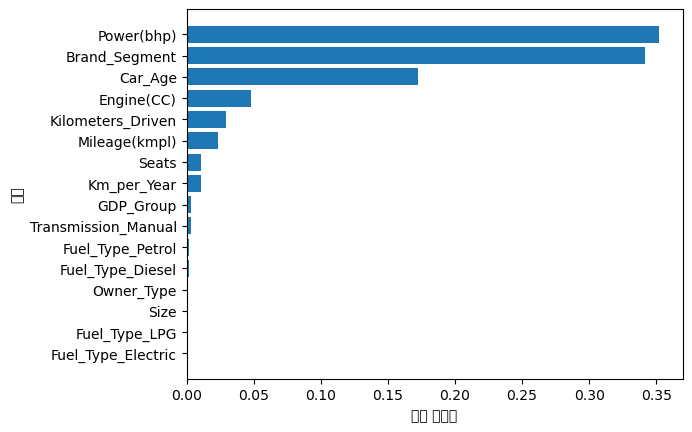

In [244]:
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")